# 02. PyTorch Classification

https://www.learnpytorch.io/02_pytorch_classification/

## Table of Contents

- [All Links in Document](#links)
- [PyTorch Classification](#class)
- [Loading and Preparing Data](#loadprep)
- [Building a Model](#buildmodel)
- [Training a Model](#trainmodel)
- [Improving a Model](#improvemodel)
- [Non-linearity](#nonlinear)
- [Replicating Non-linearity](#repnonlinear)
- [Multiclass Classification](#multiclass)

## All Links in Document <a name="links" />

- https://scikit-learn.org/stable/modules/classes.html#samples-generator
- https://www.learnpytorch.io/02_pytorch_classification/
- https://pytorch.org/docs/stable/generated/torch.nn.Linear
- https://playground.tensorflow.org/
- https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss
- https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean
- https://pytorch.org/docs/stable/generated/torch.nn.ReLU
- https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss
- https://pytorch.org/docs/stable/generated/torch.nn.Softmax
- https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html

## PyTorch Classification <a name="workflow" />

In [1]:
# Imports
import torch
from torch import nn
from torchmetrics import Accuracy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
import requests

# Helper functions from helper_functions.py
from helper_functions import plot_predictions, plot_decision_boundary

<img src="images/02_classification_examples.png" width="750" />

There are various examples of classification problems. One such example is determining whether an incoming e-mail is to be considered spam or not. This is binary classification as there is only a choice between two options. It's either one option, or the other. One of the options has to be chosen, and the e-mail cannot be both or neither. Multiclass classification takes binary classicfication to another level, where more than two class options are available. The given example of classifying food shows how there can be many available options. There is also multilabel classification, used for granting multiple, descriptive tags to a sample.

<img src="images/02_classification_input_output.png" width="750" />

The above image shows an example lifecycle of input and output in a neural network aimed at image classification. Data needs to be converted into tensors. The width, height, and colour channels are each converted into tensors through numerical encoding. This numerical data is given to the model, the model does its thing, and output is given in the form of tensors. After a conversion, these tensors represent the probability that a given image is of a certain class. The example shows attempts at classifying sushi, steak, or pizza.

<img src="images/02_params.png" />

The above image shows a typical architecture of a classification neural network.

## Loading and Preparing Data  <a name="loadprep" />

Using a sample generator to create a "toy dataset" from https://scikit-learn.org/stable/modules/classes.html#samples-generator

In [2]:
# Manually making circles to start out with a numerical dataset
# The noise is a standard deviation of Gaussian noise added to the data
# The random_state sets the seed
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


Here, each sample of X has two features and one corresponding label in y. Within y only two classes are found: 0 and 1. Thus, this starts out as a binary classification problem. If y contained 0, 1, 2, and/or more numbers, it would be a multiclass classification problem.

In [5]:
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


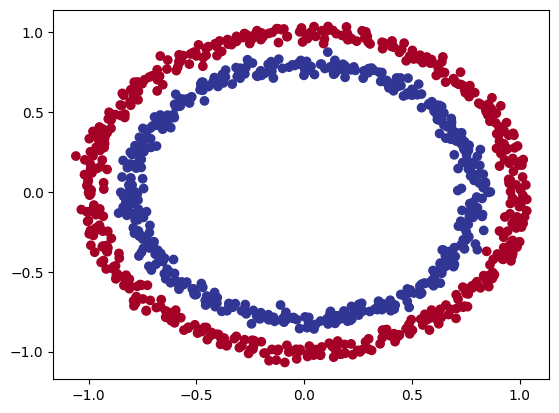

In [6]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

As visualized, the `make_circles()` method from sklearn creates two circles through points in a coordinate system: one larger and one smaller. This is a toy dataset for experimentation and practice.

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
# Converting the data to tensors
# conversion is done to float32 to be safe later on as this is the default PyTorch data type
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [10]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [11]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# Creating the train and test split
# 80:20 split
# Using the same random_state seed
# Can't use torch.manual_seed(42) as that would only affect PyTorch code
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a Model <a name="buildmodel" />

To do:
- Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Modu1e`)
- Create 2 `nn.Linear()` layers that are capable of handling the shapes of the data
- Define a `forward()` method that outlines the forward pass (or forward computation) of the model
- Instantiate an instance of the model class (and send it to the target device)

https://pytorch.org/docs/stable/generated/torch.nn.Linear

In [14]:
# Manually constructing a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and outputs 5
        self.layer2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 previous feature and outputs 1
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.layer2(self.layer1(x))

In [15]:
# Replicating above model using nn.Sequential
torch.manual_seed(42)
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [16]:
model_0.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)>

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('1.bias', tensor([-0.2060]))])

In [18]:
with torch.inference_mode():
    untrained_preds = model_0(X_test)
print(f"Length test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"Length predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}\n")
print(f"First 10 predictions:\n{untrained_preds[:10]}\n")
print(f"First 10 labels:\n{y_test[:10]}")

Length test samples: 200, Shape: torch.Size([200, 2])
Length predictions: 200, Shape: torch.Size([200, 1])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


It's also possible to recreate the neural network and play around with it in the Tensorflow playground website:<br>
https://playground.tensorflow.org/

<img src="images/02_tensorflow_playground.png" />

## Training a Model <a name="trainmodel" />

Which loss function and optimizer to use is problem specific. The example model that was built in the previous Jupyter Notebook file focused on regression. There, the `nn.L1Loss()` loss function (Mean Absolute Error), and the `torch.optim.SGD()` optimizer function (Stochastic Gradient Descent) were used. Now, the problem pertains itself to classification, for which loss function options such as Binary Cross Entropy or Categorical Cross Entropy are more effective. Below is a small overview of example loss functions, optimizers, and their applications.

<img src="images/02_loss_optim_table.png" />

This specific use case is binary classification, making Binary Cross Entropy a good candidate to try out. This example will use make use of the `nn.BCELossWithLogitsLoss()` loss function. According to the docs, this function combined the loss function and the sigmoid layer into one function, making it overall more numerically stable. A "logit" is a raw, unnormalized number output created by the model. Normalizing this type of output with a sigmoid function is seen in the previous Notebook's sections on Stochastic Gradient Descent and Backpropagation.

https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss<br>
https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean

In [19]:
# These are raw outputs and thus logits
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]])

In [20]:
# Output after normalization with a Sigmoid function
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]])

In [21]:
# Range-style rounding to determine class
y_preds = torch.round(y_preds_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [22]:
# Showing that y_preds and y_preds_labels will have the same result
with torch.inference_mode():
    y_preds_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

tensor([True, True, True, True, True])


In [23]:
# Results are naturally not yet correct as the model is untrained as of now
print(torch.eq(y_test[:5], y_preds_labels.squeeze()))
print(f"Actual:{y_test[:5]},\nPredicted:{y_preds_labels.squeeze()}")

tensor([False,  True, False,  True, False])
Actual:tensor([1., 0., 1., 0., 1.]),
Predicted:tensor([0., 0., 0., 0., 0.])


Thus, `nn.BCEWithLogitsLoss()` has these steps built into it, saving effort and making the whole more numerically sound.

In [24]:
# Loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [25]:
# manually creating an accuracy function to show how it works
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct/len(y_pred) * 100

Once again create a training loop:

- Forward pass
- Calculate loss
- Optimizer zero grad
- Backpropagation
- Optimizer step (SGD)

In [26]:
torch.manual_seed(42)
epochs = 101

for epoch in range(epochs):
    # Set model to training mode (optional)
    model_0.train()
    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # Calculate loss/accuracy
    # nn.BCEWithLogitsLoss() expects input with logits
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    # Set gradients to 0
    optimizer.zero_grad()
    # Perform backwards propagation
    loss.backward()
    # Perform gradient descent
    optimizer.step()
    # Turn off several settings not needed for testing and evaluation
    model_0.eval()
    # Turn off gradient tracking and a few more things...
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # Calculate test loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        # Printing
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
            #print(model_0.state_dict())

Epoch: 0 | Loss: 0.69569, Acc: 50.00% | Test Loss: 0.69721, Test Acc: 50.00%
Epoch: 10 | Loss: 0.69403, Acc: 50.00% | Test Loss: 0.69615, Test Acc: 50.00%
Epoch: 20 | Loss: 0.69343, Acc: 46.00% | Test Loss: 0.69585, Test Acc: 48.50%
Epoch: 30 | Loss: 0.69321, Acc: 49.00% | Test Loss: 0.69577, Test Acc: 47.50%
Epoch: 40 | Loss: 0.69312, Acc: 49.50% | Test Loss: 0.69573, Test Acc: 46.50%
Epoch: 50 | Loss: 0.69308, Acc: 50.38% | Test Loss: 0.69569, Test Acc: 46.50%
Epoch: 60 | Loss: 0.69306, Acc: 50.50% | Test Loss: 0.69564, Test Acc: 46.50%
Epoch: 70 | Loss: 0.69305, Acc: 50.50% | Test Loss: 0.69559, Test Acc: 46.50%
Epoch: 80 | Loss: 0.69304, Acc: 50.75% | Test Loss: 0.69553, Test Acc: 46.50%
Epoch: 90 | Loss: 0.69303, Acc: 50.38% | Test Loss: 0.69547, Test Acc: 46.50%
Epoch: 100 | Loss: 0.69302, Acc: 50.50% | Test Loss: 0.69542, Test Acc: 46.50%


The model doesn't seem to perform very well at first glance. The losses barely go down and the accuracy slightly decreases at times as well. Overall, the model in its current state will not perform better than a 50/50 guess or the result of a coin toss. It's possible to visualize what's going on through some helper functions.

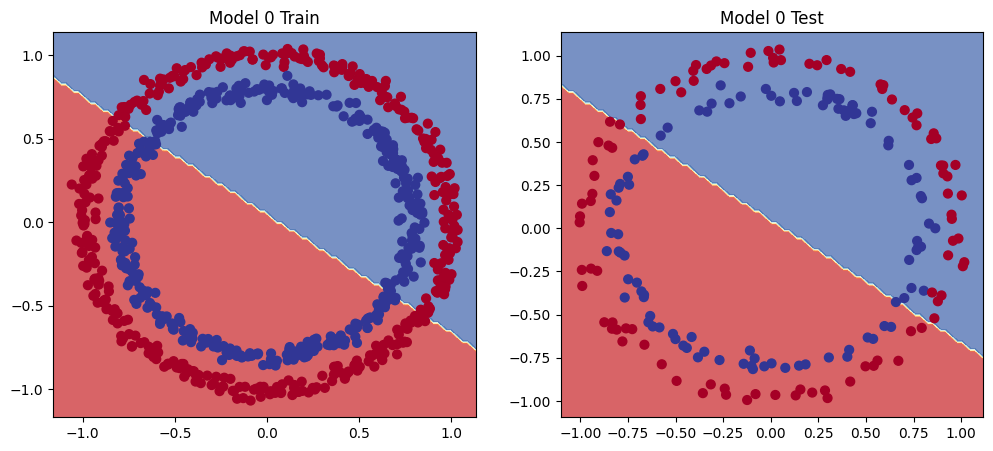

In [27]:
# Helper functions for visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Model 0 Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model 0 Test")
plot_decision_boundary(model_0, X_test, y_test)

These plots show the kind of line that the model is trying to draw through the data to categorize the two classes. However, the line being drawn is straight while the data itself is circular. Recall that within the model are two "linear" layers, which are not suited for this kind of data. This means that the model contains a fundamental flaw, and tinkering with other options such as the number of neurons, features, or epochs will not be able to improve the model.

## Improving a Model <a name="improvemodel" />

There are various ways to improve a model, some of which are:

- Adding more layers (giving the model more chance to learn about patterns in the data)
- Adding more hidden units (e.g., increasing from 5 hidden units to 10 hidden units)
- Fit for longer (increasing number of epochs)
- Changing activation functions (currently using sigmoid function)
- Changing the learning rate
- Changing the loss function

Which options to explore depend on the outcome of your model. All of these options are from a model's perspective as they influence the model directly. It's also possible to improve the model through supplying better data, which is a different approach. In addition, as all these values can be changed directly, they are referred to as **hyperparameters**.

<img src="images/02_improvement_options.png" />

The following is an example to show what happens when multiple improvements are attempted at once. Note that it's usually recommended to only change one hyperparameter at a time to properly keep track of what is exerting the most influence.

Attempted improvements:

- Adding more hidden units: 5 > 10
- Increasing number of layers: 2 > 3
- Increasing the number of epochs: 100 > 1000

In [28]:
# Subclassing nn.Module instead of using nn.Sequential for practice
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.layer3(self.layer2(self.layer1(x)))

In [29]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [30]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [31]:
torch.manual_seed(42)
epochs = 1001

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        loss = loss_fn(test_logits, y_test)
        acc = accuracy_fn(y_test, test_pred)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
            #print(model_1.state_dict())

Epoch: 0 | Loss: 0.69261, Acc: 51.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 100 | Loss: 0.69379, Acc: 48.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 200 | Loss: 0.69437, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 300 | Loss: 0.69458, Acc: 45.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 400 | Loss: 0.69465, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 500 | Loss: 0.69467, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 600 | Loss: 0.69468, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 700 | Loss: 0.69468, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 800 | Loss: 0.69468, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 900 | Loss: 0.69468, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 1000 | Loss: 0.69468, Acc: 46.00% | Test Loss: 0.69542, Test Acc: 46.50%


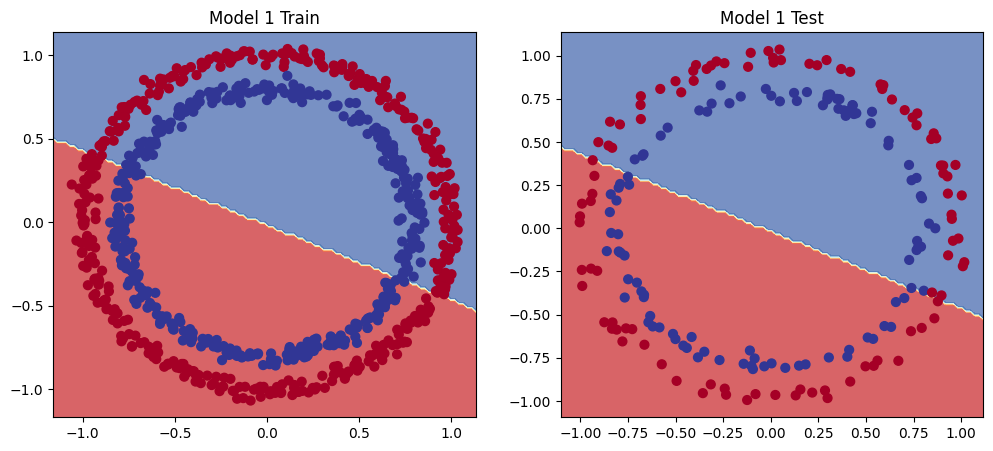

In [32]:
# Helper functions for visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Model 1 Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model 1 Test")
plot_decision_boundary(model_1, X_test, y_test)

In [33]:
# Making linear data to try the model on
weight, bias = 0.7, 0.3
X_regression = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
Xrg_train, Xrg_test, yrg_train, yrg_test = train_test_split(X_regression, y_regression, 
                                                            train_size=0.8, random_state=42,
                                                            shuffle=False)

In [34]:
len(Xrg_train), len(Xrg_test), len(yrg_train), len(yrg_test)

(80, 20, 80, 20)

In [35]:
# Recreating CircleModelV1 with nn.Sequential with slightly altered architecture to accommodate the linear data
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [37]:
torch.manual_seed(42)
epochs = 1001

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(Xrg_train)
    loss = loss_fn(y_pred, yrg_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(Xrg_test)
        test_loss = loss_fn(test_pred, yrg_test)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")
            #print(model_2.state_dict())

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Loss: 0.05600 | Test Loss: 0.01425
Epoch: 900 | Loss: 0.05571 | Test Loss: 0.00603
Epoch: 1000 | Loss: 0.06455 | Test Loss: 0.02425


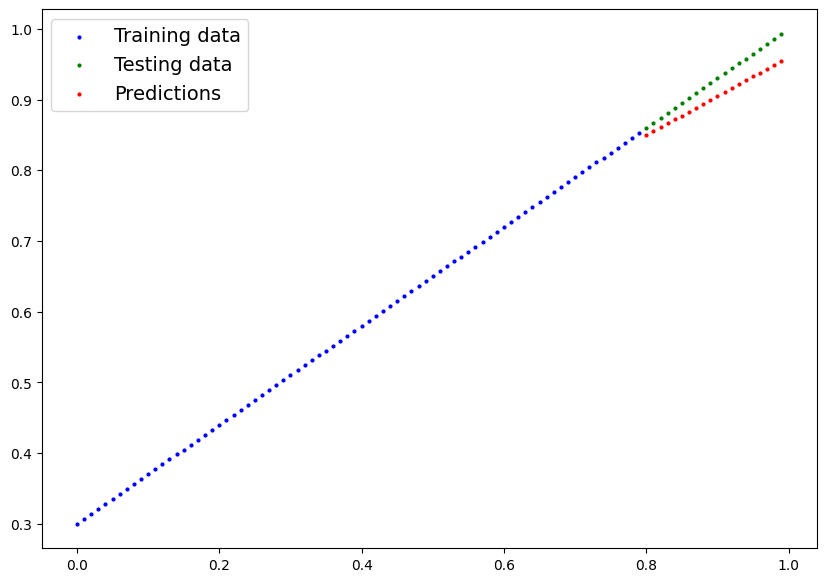

In [38]:
with torch.inference_mode():
    y_preds = model_2(Xrg_test)
plot_predictions(train_data=Xrg_train, 
                 train_labels=yrg_train, 
                 test_data=Xrg_test, 
                 test_labels=yrg_test, 
                 predictions=y_preds)

As evident from `CircleModelV1`'s performance and the visualizations, there were no improvements made at all. The model is attempting to apply a linear solution on circular data, which simply does not work. Then, `model_2` was created, being near-identical to `CircleModelV1`, only slightly altered to accept linear data. The same changes to hyperparameters were also incorporated during the training loop. Now, this model does produce good results on linear data, showing that the model is indeed capable of learning. As briefly mentioned before, there is a more structural flaw at play. This example shows that there is indeed no solving the data-shape issue through hyperparameter tinkering as long as the more critical problem remains.

## Non-linearity <a name="nonlinear" />

- Linear = straight linear
- Non-linear = non-straight lines
Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

The method to solve the aforementioned problem lies in the concepto of non-linearity. So far, the models that were created are only equipped to handle linear data. This is where a change needs to be made.

In [39]:
# Recreating the 1000-sample large circular dataset
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

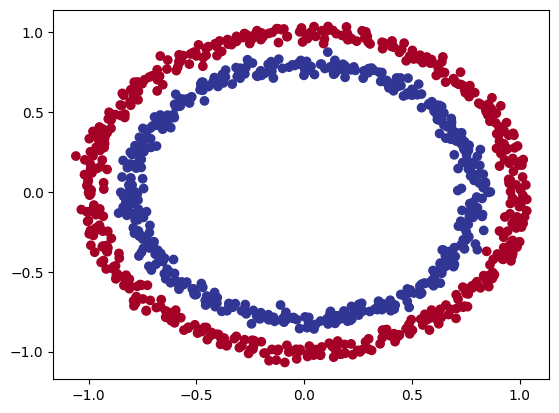

In [40]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [41]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

The Rectified Linear Unit Function (ReLU) is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. Despite having "linear" in its name, ReLU is used as a non-linear activation function in machine learning.

https://pytorch.org/docs/stable/generated/torch.nn.ReLU

In [43]:
# Building a model manually again for practice + ReLU
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [44]:
model_3 = CircleModelV2()
model_3, model_3.state_dict()

(CircleModelV2(
   (layer1): Linear(in_features=2, out_features=10, bias=True)
   (layer2): Linear(in_features=10, out_features=10, bias=True)
   (layer3): Linear(in_features=10, out_features=1, bias=True)
   (relu): ReLU()
 ),
 OrderedDict([('layer1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188],
                       [ 0.6146,  0.1323],
                       [ 0.5224,  0.0958],
                       [ 0.3410, -0.0998],
                       [ 0.5451,  0.1045],
                       [-0.3301,  0.1802]])),
              ('layer1.bias',
               tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                        0.0667, -0.6984])),
              ('layer2.weight',
               tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
          

Looking at the model parameters like this doesn't really show where the ReLU gets applied, but it does show that the `ReLU()` function is a part of the model. Also, the ReLU doesn't have any parameters to optimize, which is why it doesn't show up in the `state_dict()` of `model_3`.

In [45]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [46]:
torch.manual_seed(42)
epochs = 2001

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
            #print(model_3.state_dict())

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69319, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test Loss: 0.69102, Test Acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test Loss: 0.68940, Test Acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test Loss: 0.68723, Test Acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test Loss: 0.68411, Test Acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test Loss: 0.67941, Test Acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test Loss: 0.67285, Test Acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test Loss: 0.66322, Test Acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test Loss: 0.64757, Test Acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test Loss: 0.62145, Test Acc: 79.00%
Epoch: 1000 | Loss: 0.56818, Acc: 87.75% | Test Loss: 0.57378, Test Acc: 86.50%
Epoch: 1100 | Loss: 0.48153, Acc: 93.50% | Test Loss: 0.49935, Test Acc: 90.50%
Epoch: 1200 | Loss: 0.37056, Acc: 97.75% | Test Loss

In [47]:
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

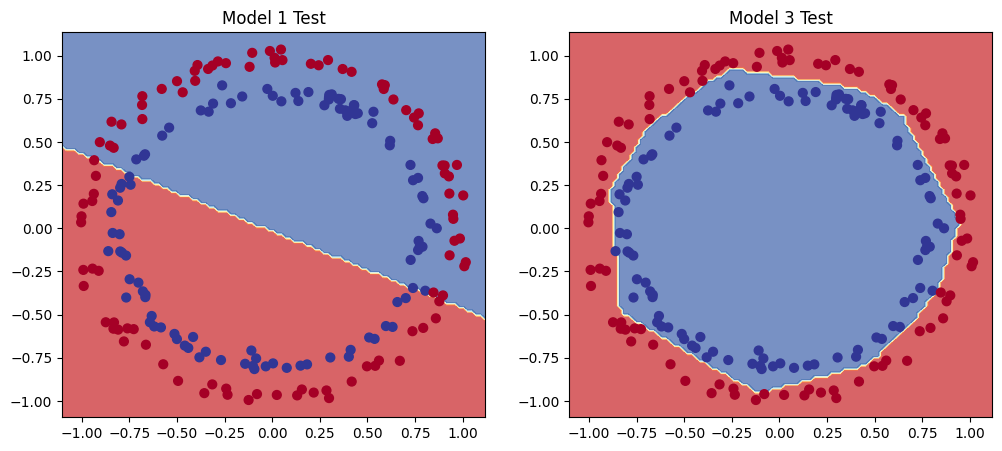

In [48]:
# Helper functions for visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Model 1 Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.subplot(1, 2, 2)
plt.title("Model 3 Test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating Non-linearity <a name="repnonlinear" />

In [49]:
# Making a linear tensor to use for ReLU
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype, A

(torch.float32,
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

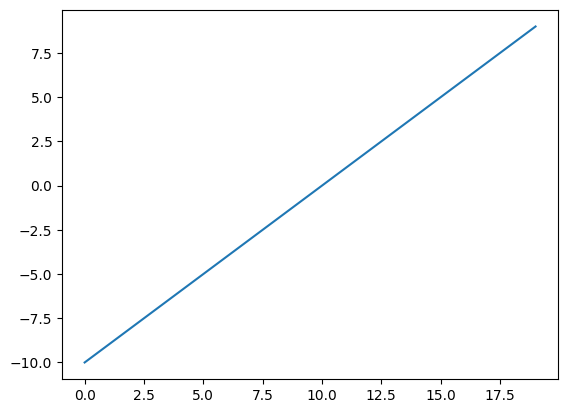

In [50]:
plt.plot(A)

https://pytorch.org/docs/stable/generated/torch.nn.ReLU

In [51]:
# Input has to be a tensor
def ReLU(x: torch.tensor) -> torch.tensor:
    return torch.max(torch.tensor(0), x)

<img src="images/02_relu_equation.png" />

In [52]:
ReLU(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

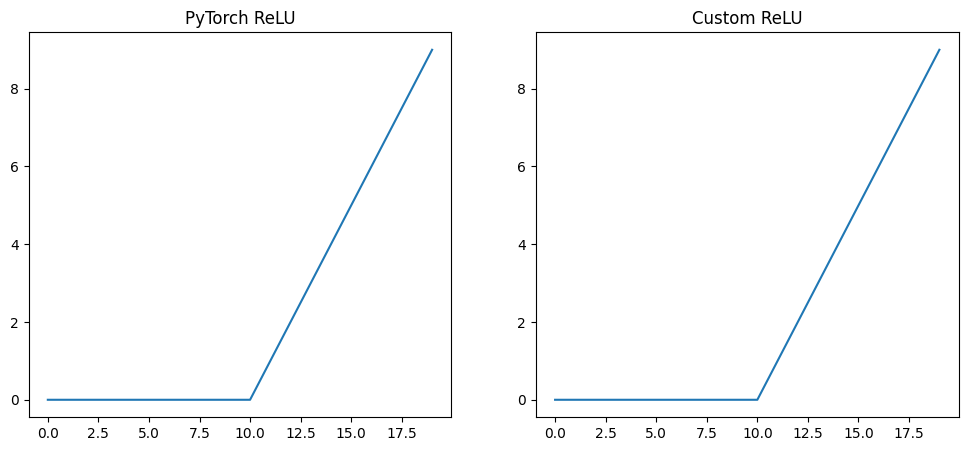

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("PyTorch ReLU")
plt.plot(torch.relu(A))
plt.subplot(1, 2, 2)
plt.title("Custom ReLU")
plt.plot(ReLU(A))

The Rectified Linear Unit function (ReLU) takes in a collection of numbers. For each of those numbers, if the number is positive then it remains itself. If the number is negative, then it is transformed into a 0. This is quite simple behaviour, which can be manually replicated with the created `reLU()` function.

https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid

In [54]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

<img src="images/02_sigmoid_equation.png" />

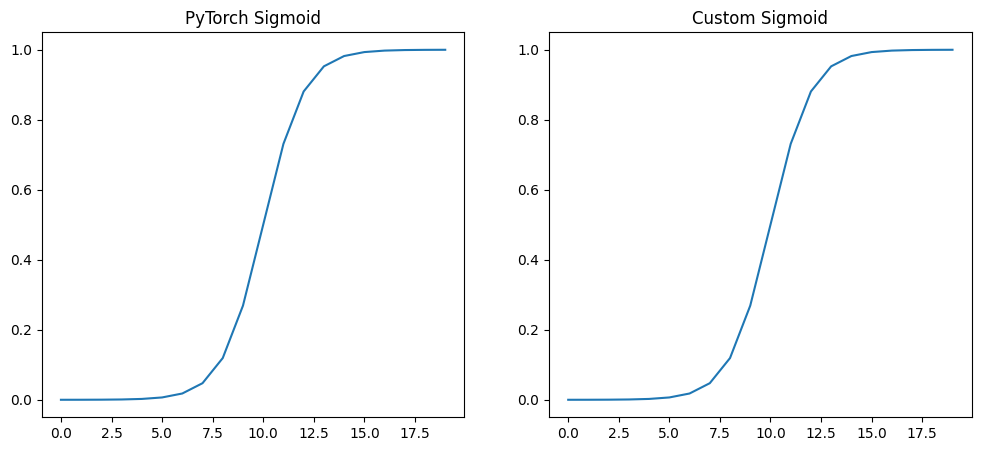

In [55]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("PyTorch Sigmoid")
plt.plot(torch.sigmoid(A))
plt.subplot(1, 2, 2)
plt.title("Custom Sigmoid")
plt.plot(sigmoid(A))

The same can also be done with the Sigmoid function, as shown above.

## Multiclass Classification <a name="multiclass" />

The cases thus far have been about binary classification, which is about making a decision between one thing or another. There are only 2 given options. However, many situations will require for the power to choose between more than 2 options. This is where multiclass classification comes into play.

Using a sample generator to create a "toy dataset" from https://scikit-learn.org/stable/modules/classes.html#samples-generator

In [56]:
n_samples = 1000
X_blob, y_blob = make_blobs(n_samples, n_features=2, centers=4, cluster_std=1.5, random_state=42)
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.long)

In [57]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, train_size=0.8, random_state=42)

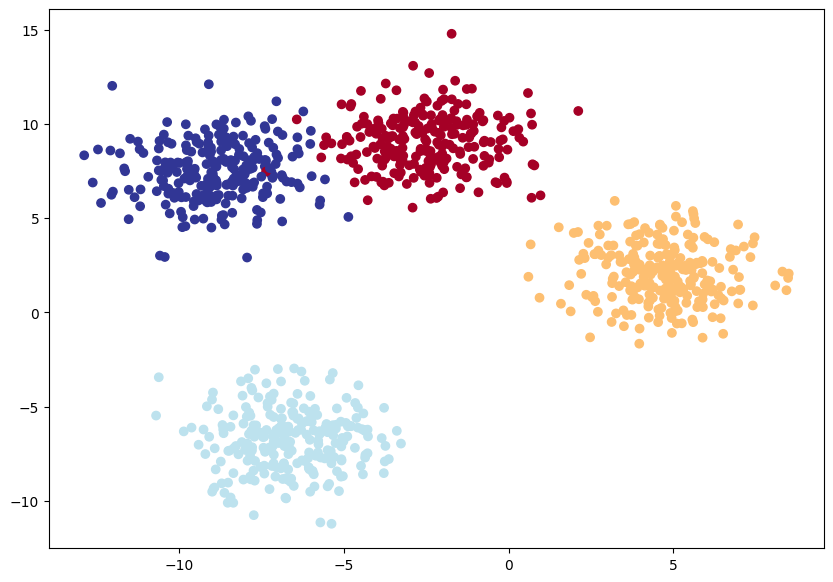

In [58]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [59]:
# 2 input features, 1 output feature
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [60]:
# 4 total classes
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [61]:
class BlobModel(nn.Module):
    def __init__(self, in_f, out_f, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=in_f, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_f)
        )
    
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear_layer_stack(x)

In [62]:
model_4 = BlobModel(in_f=2, out_f=4)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

New cool stuff being used here:
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss<br>
- https://pytorch.org/docs/stable/generated/torch.nn.Softmax<br>
- https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html

In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)
metric_acc = Accuracy(task="multiclass", num_classes=4)

In [64]:
torch.manual_seed(42)
epochs = 101

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_blob_train).squeeze()
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = metric_acc(y_pred, y_blob_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test).squeeze()
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = metric_acc(test_pred, y_blob_test)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
            #print(model_3.state_dict())

Epoch: 0 | Loss: 1.15883, Acc: 0.40% | Test Loss: 1.07554, Test Acc: 0.48%
Epoch: 10 | Loss: 0.64476, Acc: 0.97% | Test Loss: 0.66069, Test Acc: 0.98%
Epoch: 20 | Loss: 0.42535, Acc: 0.99% | Test Loss: 0.43074, Test Acc: 1.00%
Epoch: 30 | Loss: 0.25294, Acc: 0.99% | Test Loss: 0.24508, Test Acc: 1.00%
Epoch: 40 | Loss: 0.11232, Acc: 0.99% | Test Loss: 0.10229, Test Acc: 1.00%
Epoch: 50 | Loss: 0.06627, Acc: 0.99% | Test Loss: 0.05848, Test Acc: 1.00%
Epoch: 60 | Loss: 0.05068, Acc: 0.99% | Test Loss: 0.04293, Test Acc: 1.00%
Epoch: 70 | Loss: 0.04300, Acc: 0.99% | Test Loss: 0.03491, Test Acc: 1.00%
Epoch: 80 | Loss: 0.03836, Acc: 0.99% | Test Loss: 0.02988, Test Acc: 1.00%
Epoch: 90 | Loss: 0.03525, Acc: 0.99% | Test Loss: 0.02663, Test Acc: 1.00%
Epoch: 100 | Loss: 0.03312, Acc: 0.99% | Test Loss: 0.02433, Test Acc: 1.00%


In [65]:
with torch.inference_mode():
    y_blob_preds = torch.softmax(model_4(X_blob_test).squeeze(), dim=1).argmax(dim=1)
y_blob_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

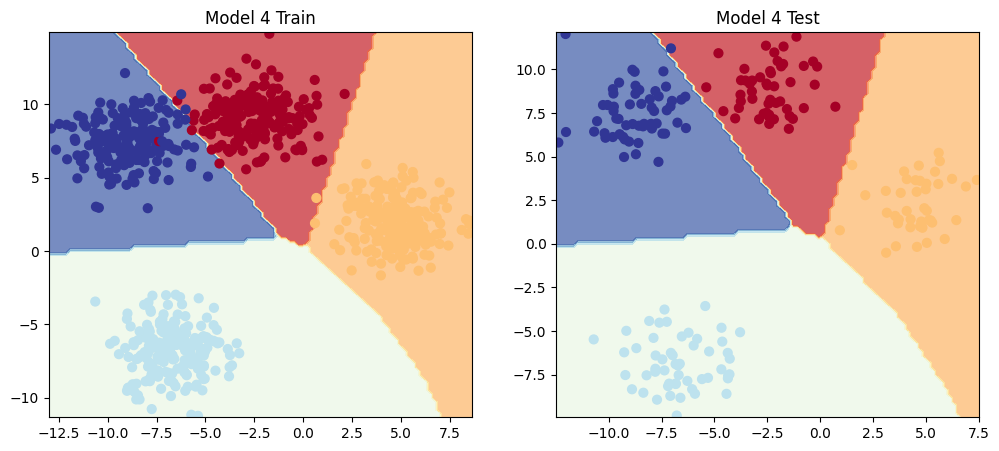

In [66]:
# Helper functions for visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Model 4 Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Model 4 Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)